<a href="https://colab.research.google.com/github/AndresMontesDeOca/Laboratorio3/blob/main/Labo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio III

## Librerias

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
# warnings.filterwarnings('ignore', category=ValueWarning)
warnings.filterwarnings('ignore')

# Ajustar la opción para mostrar más filas
# pd.set_option('display.max_rows', None)

# Si también quieres mostrar más columnas
# pd.set_option('display.max_columns', None)


# Vamos a suprimir la notacion cientifica
pd.set_option("display.float_format", lambda x:"%.2f" %x)


## Funciones Auxiliares

In [46]:
# Funciones Auxiliares
def plot_cumsum(data, periodo_start, periodo_end, threshold_percentage):
    # Filtrar datos y agrupar por product_id
    filtered_data = data[(data['periodo'] >= periodo_start) & (data['periodo'] <= periodo_end)]

    # Sumar las ventas por producto y ordenar de mayor a menor
    total_sales = filtered_data.groupby('product_id')['tn'].sum().sort_values(ascending=False)

    # Calcular la suma acumulada y el porcentaje acumulado
    total_sales_cumsum = total_sales.cumsum()
    total_sales_cumsum_percentage = total_sales_cumsum / total_sales.sum() * 100

    # Crear un índice basado en el conteo de productos
    total_sales_cumsum_percentage.index = range(1, len(total_sales_cumsum_percentage) + 1)

    # Crear la gráfica de suma acumulada
    plt.figure(figsize=(14, 10))
    plt.plot(total_sales_cumsum_percentage, marker='o', linestyle='-')
    plt.xlabel('Number of Products')
    plt.ylabel('Cumulative Percentage of Total Sales')
    plt.title(f'Cumulative Sales Percentage by Number of Products up to {threshold_percentage*100}%')
    plt.grid(True)
    plt.axhline(y=threshold_percentage * 100, color='r', linestyle='--')  # Línea de referencia
    plt.show()

    # Calcular el umbral en porcentaje
    threshold = threshold_percentage * 100
    top_x_products = total_sales_cumsum_percentage[total_sales_cumsum_percentage <= threshold]

    # Crear un DataFrame con el número de posición, product_id, y cumsum
    result_df = pd.DataFrame({
        # 'Position': range(1, len(top_x_products) + 1),
        'Product_ID': total_sales.index[top_x_products.index - 1],
        'Cumulative_Percentage': top_x_products.values
    })

    return result_df
################################################################################
def common_product_ids(series1, series2, series3):
    # Encontrar los productos comunes entre las tres series
    common_ids = series1[series1.isin(series2) & series1.isin(series3)]
    return common_ids


## Carga Datos

In [2]:
# Code to read csv file into Colaboratory:
# !pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

################################# Datasets ###################################
# # Ventas
id = "158aOjqxaNO8l97yA6VWJkek_15YVLMhs"
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('sell-in.txt')
data_ventas = pd.read_csv("sell-in.txt", sep="\t")
data_ventas['periodo'] = pd.to_datetime(data_ventas['periodo'], format='%Y%m')
data = data_ventas.copy()

# # Productos
id = "15JS_k86LS0sgJXma7BOVXWlyNcMwxdhE"
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('tb_productos.txt')
data_productos = pd.read_csv("tb_productos.txt", sep="\t")

# # Stocks
id = "15EV-8f_U7onpA1AcTxxXeD-z8yVR4fQu"
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('tb_stocks.txt')
data_stocks = pd.read_csv("tb_stocks.txt", sep="\t")
data_stocks['periodo'] = pd.to_datetime(data_stocks['periodo'], format='%Y%m')

# # Productos a predecir
id = "15LjADctFVwjzQFJvfJGFTEdgZx9xCoId"
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('productos_a_predecir.txt')
data_productos_a_predecir = pd.read_csv("productos_a_predecir.txt", sep="\t")



## Clase #2

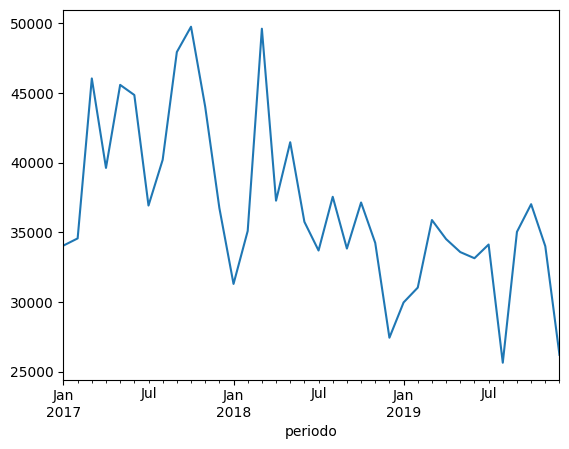

In [3]:
# Generamos la Serie de Tiempo con la suma en toneladas vendidas por mes
data_ts = data_ventas.groupby('periodo').sum()['tn']
data_ts.plot()

plt.show()

### Predicciones Mayo 2019

In [4]:
# Con los datos de Marzo 2019, predecir cuantas ventas va a haber en Mayo 2019 y calcular el error
data

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn
0,2017-01-01,10234,20524,0,2,0.05,0.05
1,2017-01-01,10032,20524,0,1,0.14,0.14
2,2017-01-01,10217,20524,0,1,0.03,0.03
3,2017-01-01,10125,20524,0,1,0.02,0.02
4,2017-01-01,10012,20524,0,11,1.54,1.54
...,...,...,...,...,...,...,...
2945813,2019-12-01,10105,20853,0,1,0.02,0.02
2945814,2019-12-01,10092,20853,0,1,0.01,0.01
2945815,2019-12-01,10006,20853,0,7,0.03,0.03
2945816,2019-12-01,10018,20853,0,4,0.02,0.02


#### Ventas iguales a Marzo 2019

In [5]:
# a) Ventas de Mayo igual a las de Marzo
prediccion_201905_A = data.query('periodo == "2019-03"').groupby('product_id')['tn'].sum()
prediccion_201905_A

product_id
20001   1470.66
20002   1083.63
20003    638.04
20004    619.77
20005    488.21
          ...  
21266      0.02
21267      0.22
21269      0.18
21271      0.01
21276      0.12
Name: tn, Length: 895, dtype: float64

#### Ventas promedio de los ultimos 6 meses (Nov 2018, Apr 2019)

In [6]:
# Data ultimos 6 meses, solo los campos necesarios
data_6month_avg_2019 = data[(data['periodo'] >= '2018-11') & (data['periodo'] <= '2019-04')][['product_id', 'tn']]

# Sumamos y dividimos por 6.
prediccion_201905_B = data_6month_avg_2019.groupby(['product_id'])['tn'].sum() / 6

prediccion_201905_B

product_id
20001   1492.14
20002   1242.89
20003    817.20
20004    571.24
20005    454.77
          ...  
21266      0.06
21267      0.06
21269      0.05
21271      0.01
21276      0.04
Name: tn, Length: 963, dtype: float64

#### Ventas de Mayo 2019

In [7]:
real_201905 = data.query('periodo == "2019-05"').groupby('product_id')['tn'].sum()
real_201905

product_id
20001   1629.78
20002   1034.99
20003    590.13
20004    603.31
20005    897.26
          ...  
21266      0.18
21267      0.24
21269      0.18
21271      0.04
21276      0.09
Name: tn, Length: 911, dtype: float64

#### Calculo del error de las estimaciones

In [8]:
error_A = np.divide((abs(real_201905 - prediccion_201905_A)), real_201905).mean()
error_B = np.divide((real_201905 - prediccion_201905_B).abs(), real_201905).mean()
print(f'Error A: {error_A.round(2)}')
print(f'Error B: {error_B.round(2)}')

Error A: 10.23
Error B: 8.49


### Prediciones Febrero 2020

#### Productos a Predecir (indicados por el cliente)

In [9]:
# Filtrar el DataFrame 'data' para que solo contenga los 'product_id' presentes en 'data_productos_a_predecir'
data_filtered = data[data['product_id'].isin(data_productos_a_predecir['product_id'])]

# Cantidad productos en la lista
print('Total Productos en la lista:', len(data_productos_a_predecir))

# Mostrar el resultado
display(data_filtered)

Total Productos en la lista: 780


,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn
0,2017-01-01,10234,20524,0,2,0.05,0.05
1,2017-01-01,10032,20524,0,1,0.14,0.14
2,2017-01-01,10217,20524,0,1,0.03,0.03
3,2017-01-01,10125,20524,0,1,0.02,0.02
4,2017-01-01,10012,20524,0,11,1.54,1.54
...,...,...,...,...,...,...,...
2945813,2019-12-01,10105,20853,0,1,0.02,0.02
2945814,2019-12-01,10092,20853,0,1,0.01,0.01
2945815,2019-12-01,10006,20853,0,7,0.03,0.03
2945816,2019-12-01,10018,20853,0,4,0.02,0.02


#### Ventas iguales a Diciembre 2019

In [10]:
# a) Ventas de Febrero 2020 igual a las de Diciembre 2019
prediccion_202002_A = data_filtered.query('periodo == "2019-12"').groupby('product_id')['tn'].sum()

display(prediccion_202002_A)
prediccion_202002_A.to_csv('prediccion_202002_A.csv')
print('Kaggle Public Score:', 0.342)

product_id
20001   1504.69
20002   1087.31
20003    892.50
20004    637.90
20005    593.24
          ...  
21263      0.01
21265      0.05
21266      0.05
21267      0.02
21276      0.01
Name: tn, Length: 780, dtype: float64

Kaggle Public Score: 0.342


#### Ventas promedio 6 meses (Jul 2019, Dec 2019)



In [11]:
# Data ultimos 6 meses, solo los campos necesarios
data_6month_avg_2020 = data_filtered[(data_filtered['periodo'] >= '2019-07') & (data_filtered['periodo'] <= '2019-12')][['product_id', 'tn']]

# Sumamos y dividimos por 6.
prediccion_202002_B = data_6month_avg_2020.groupby(['product_id'])['tn'].sum() / 6

display(prediccion_202002_B)
prediccion_202002_B.to_csv('prediccion_202002_B.csv')
print('Kaggle Public Score:', 0.313)

product_id
20001   1510.65
20002   1243.47
20003    873.46
20004    702.76
20005    726.48
          ...  
21263      0.02
21265      0.05
21266      0.06
21267      0.05
21276      0.02
Name: tn, Length: 780, dtype: float64

Kaggle Public Score: 0.313


#### Ventas promedio 12 meses (todo 2019)

In [12]:
# Data ultimos 12 meses, solo los campos necesarios
data_12month_avg_2020 = data_filtered[(data_filtered['periodo'] >= '2019-01') & (data_filtered['periodo'] <= '2019-12')][['product_id', 'tn']]

# Sumamos y dividimos por 12.
prediccion_202002_C = data_12month_avg_2020.groupby(['product_id'])['tn'].sum() / 12

display(prediccion_202002_C)
prediccion_202002_C.to_csv('prediccion_202002_C.csv')
print('Kaggle Public Score:', 0.282)

product_id
20001   1454.73
20002   1175.44
20003    784.98
20004    627.22
20005    668.27
          ...  
21263      0.03
21265      0.07
21266      0.08
21267      0.08
21276      0.04
Name: tn, Length: 780, dtype: float64

Kaggle Public Score: 0.282


#### Ventas promedio 36 meses (2017, 2018, 2019)

In [13]:
# Data ultimos 36 meses, solo los campos necesarios
data_36month_avg_2020 = data_filtered[(data_filtered['periodo'] >= '2017-01') & (data_filtered['periodo'] <= '2019-12')][['product_id', 'tn']]

# Sumamos y dividimos por 12.
prediccion_202002_D = data_36month_avg_2020.groupby(['product_id'])['tn'].sum() / 36

display(prediccion_202002_D)
prediccion_202002_D.to_csv('prediccion_202002_D.csv')
print('Kaggle Public Score:', 0.352)

product_id
20001   1398.34
20002   1009.37
20003    889.00
20004    671.62
20005    644.20
          ...  
21263      0.04
21265      0.02
21266      0.03
21267      0.03
21276      0.01
Name: tn, Length: 780, dtype: float64

Kaggle Public Score: 0.352


## Productos mas vendidos

### 2017

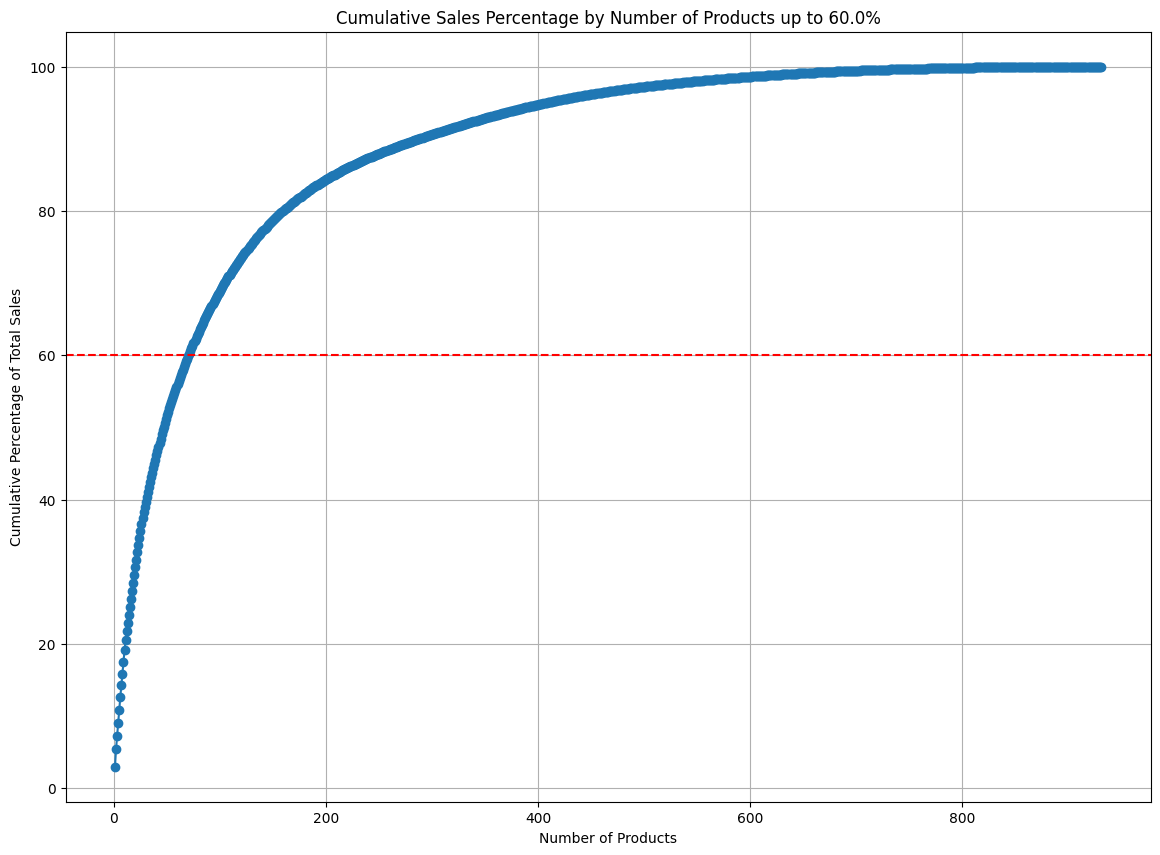

,Product_ID,Cumulative_Percentage
0,20001,2.96
1,20003,5.38
2,20007,7.22
3,20002,9.06
4,20004,10.82
...,...,...
65,20079,58.39
66,20065,58.76
67,20062,59.14
68,20066,59.51


In [43]:
top_2017 = plot_cumsum(data, '2017-01', '2017-12', 0.6)
top_2017

- Unos 70 productos acumulan el 60% de las ventas totales en el 2017

### 2018

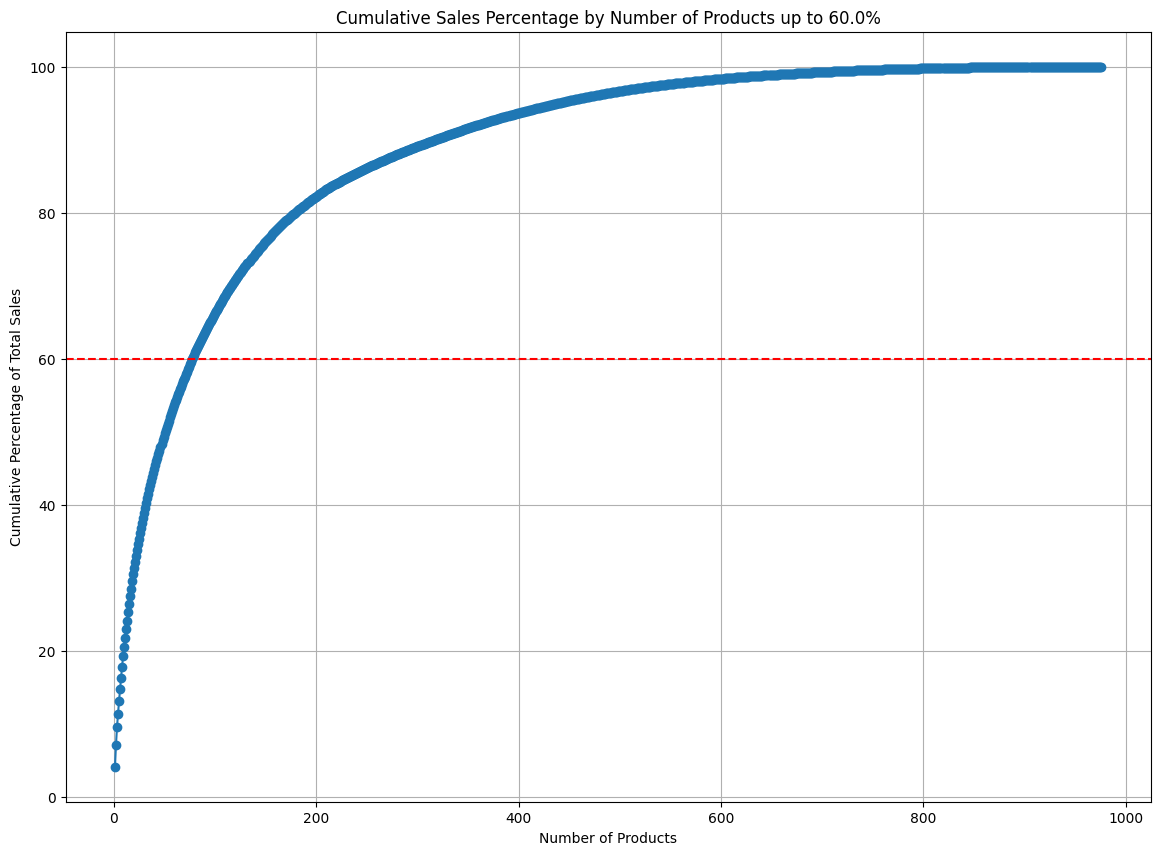

,Product_ID,Cumulative_Percentage
0,20001,4.16
1,20002,7.16
2,20003,9.58
3,20004,11.39
4,20007,13.13
...,...,...
72,20065,58.60
73,20068,58.94
74,20079,59.27
75,20067,59.60


In [44]:
top_2018 = plot_cumsum(data, '2018-01', '2018-12', 0.6)
top_2018

- En el 2017 fueron unos 77 productos los que acumularon el 60% de las ventas totales

### 2019

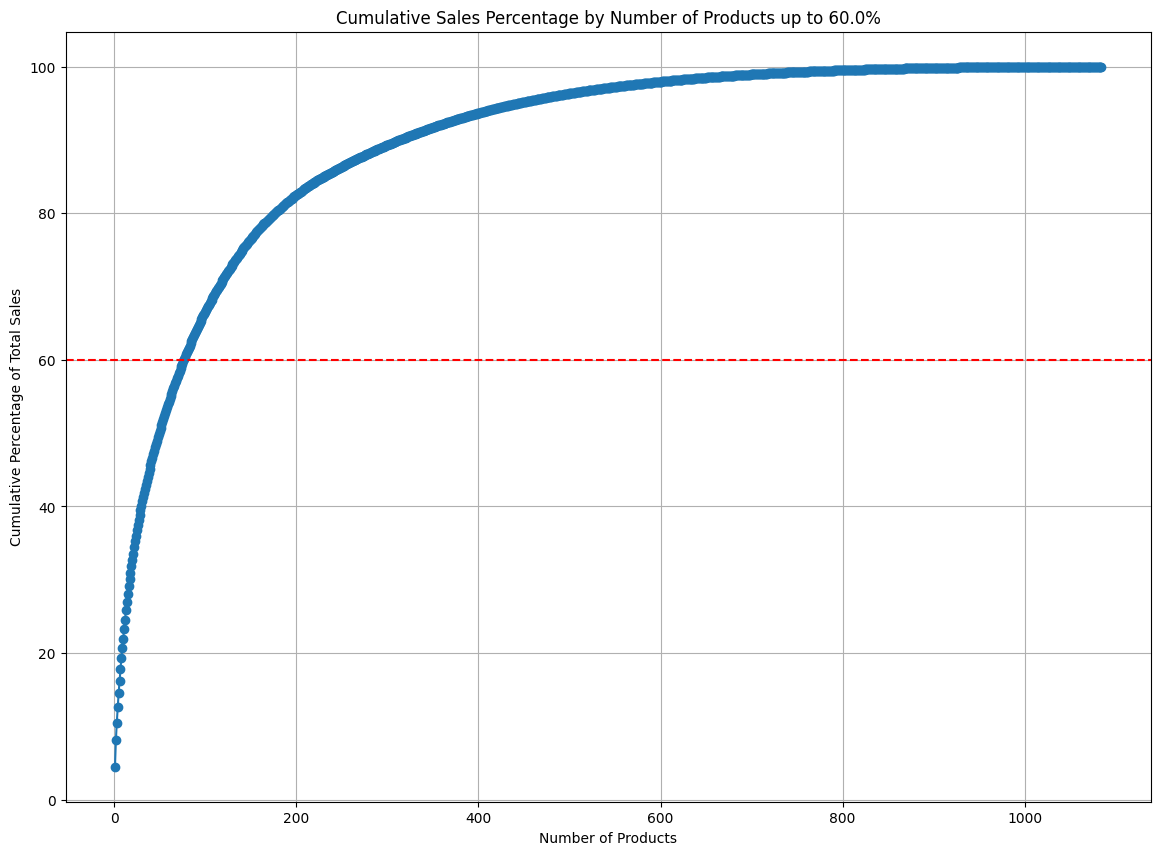

,Product_ID,Cumulative_Percentage
0,20001,4.47
1,20002,8.09
2,20003,10.50
3,20005,12.56
4,20004,14.49
...,...,...
71,20070,58.49
72,20055,58.82
73,20128,59.14
74,20143,59.46


In [45]:
top_2019 = plot_cumsum(data, '2019-01', '2019-12', 0.6)
top_2019

- Y en el 2019, la cantidad de productos que acumularon hasta el 60% de las ventas totales fueron 76, similar al mes anterior

### Comparacion 2017, 2018 y 2019

In [47]:
# Comparo si los productos mas vendidos son los mismos todos los anos
common_ids = common_product_ids(top_2017['Product_ID'], top_2018['Product_ID'], top_2019['Product_ID'])
print(common_ids)

0     20001
1     20003
2     20007
3     20002
4     20004
5     20010
6     20008
7     20006
8     20005
9     20012
10    20011
11    20013
12    20021
13    20014
14    20017
15    20016
16    20018
17    20020
18    20015
19    20030
20    20019
22    20022
23    20009
25    20024
26    20040
27    20028
28    20023
29    20029
30    20031
31    20025
33    20035
36    20033
37    20041
39    20026
40    20027
42    20038
43    20043
45    20048
46    20052
47    20039
48    20055
49    20046
50    20050
51    20056
52    20047
53    20044
55    20045
56    20051
57    20058
58    20042
59    20067
61    20054
62    20057
63    20053
66    20065
69    20061
Name: Product_ID, dtype: int64


- Pareciera ser que el Top 70 de productos mas vendidos es el mismo todos los anos, aunuqe pudiendo ser no en el mismo orden
- Podria ser una buena opcion en centrarse a estudiar los x productos mas vendidos, si es que siempre son los mismos cada ano. Podriamos hacer una prediccion mas detallada para esos productos y otra mas general para el resto

## Clase #3

### ARIMA

In [60]:
data_filtered[['periodo', 'product_id', 'tn']]

,periodo,product_id,tn
0,2017-01-01,20524,0.05
1,2017-01-01,20524,0.14
2,2017-01-01,20524,0.03
3,2017-01-01,20524,0.02
4,2017-01-01,20524,1.54
...,...,...,...
2945813,2019-12-01,20853,0.02
2945814,2019-12-01,20853,0.01
2945815,2019-12-01,20853,0.03
2945816,2019-12-01,20853,0.02


In [63]:
import pandas as pd

# Suponiendo que tu DataFrame es data_filtered

# Agrupa los datos por 'product_id' y 'periodo', y calcula la suma de 'tn'
grouped_data = data_filtered.groupby(['product_id', 'periodo']).sum().reset_index()

# Crea un DataFrame pivoteado donde las filas son las fechas y las columnas son los product_id
pivot_data = grouped_data.pivot(index='periodo', columns='product_id', values='tn')

# Rellena los NaN con 0 si es necesario
pivot_data = pivot_data.fillna()

# Muestra el DataFrame
pivot_data


product_id,20001,20002,20003,20004,20005,20006,20007,20008,20009,20010,...,21248,21252,21256,21259,21262,21263,21265,21266,21267,21276
periodo,,,,,,,,,,,,,,,,,,,,,
2017-01-01,934.77,550.16,1063.46,555.92,494.27,528.41,464.67,523.05,378.08,441.26,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2017-02-01,798.02,505.89,752.12,508.20,551.43,599.19,638.63,631.71,475.24,562.98,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2017-03-01,1303.36,834.74,917.17,489.91,563.90,868.34,840.83,937.42,456.07,718.45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2017-04-01,1069.96,522.35,525.83,512.05,662.59,565.32,741.17,626.52,338.72,607.73,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2017-05-01,1502.20,843.44,620.48,543.37,515.59,813.18,858.04,849.49,455.37,760.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2017-06-01,1520.07,968.16,744.09,590.51,528.59,698.32,850.76,739.24,548.52,1032.41,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2017-07-01,1030.67,845.39,785.12,569.88,625.85,670.78,767.24,563.83,406.52,573.89,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2017-08-01,1267.39,619.71,864.22,1042.53,1068.02,781.41,874.87,837.32,411.07,651.39,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2017-09-01,1316.95,1065.35,1465.83,1259.65,1247.89,599.27,912.11,671.25,464.71,940.83,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
